In [1]:
import pandas as pd

In [2]:

df = pd.read_csv("data/titanic_kaggle.csv")
df_titanic = df.sample(frac=0.75)
df_test = df.loc[df.index.difference(df_titanic),:]
    

In [3]:

from binarybeech.binarybeech import *
import binarybeech.utils as utils


In [4]:

import logging
logging.basicConfig(level=logging.INFO)


In [5]:

rf_titanic = RandomForest(df_titanic.copy(),"Survived", cart_settings={"max_depth":4,"min_leaf_samples":2, "min_split_samples":2},sample_frac=0.3,n_attributes=5,metrics_type="classification"
                                 )

In [6]:

rf_titanic.train(20)


A tree with 14 leafs was created
A tree with 10 leafs was created
A tree with 12 leafs was created
A tree with 11 leafs was created
A tree with 15 leafs was created
A tree with 14 leafs was created
A tree with 11 leafs was created
A tree with 11 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 13 leafs was created
A tree with 11 leafs was created
A tree with 14 leafs was created
A tree with 12 leafs was created
A tree with 15 leafs was created
A tree with 14 leafs was created
A tree with 15 leafs was created
A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 6 leafs was created


In [7]:

rf_titanic.validate_oob()


{'precision': array([0.94974874, 0.46296296]),
 'recall': array([0.72275335, 0.86206897]),
 'F-score': 0.7116282720458381,
 'accuracy': 0.7529940119760479}

In [8]:

rf_titanic.validate()


{'precision': array([0.97738693, 0.5       ]),
 'recall': array([0.74236641, 0.9375    ]),
 'F-score': 0.7479958502310666,
 'accuracy': 0.7844311377245509}

In [9]:

rf_titanic.variable_importance()


{'Sex': 1.0,
 'Pclass': 0.44398340248962653,
 'Age': 0.3319502074688798,
 'Fare': 0.31120331950207475,
 'PassengerId': 0.2863070539419088,
 'Embarked': 0.1825726141078838,
 'Parch': 0.1535269709543568,
 'SibSp': 0.09128630705394196,
 'Name': 0.0,
 'Ticket': 0.0,
 'Cabin': 0.0}

In [10]:

import binarybeech.utils as bu
bu.print_bars(rf_titanic.variable_importance(),max_width=50)



Sex       |############################### 1.0
Pclass    |##############                 0.44
Age       |##########                     0.33
Fare      |##########                     0.31
PassengerId|#########                      0.29
Embarked  |######                         0.18
Parch     |#####                          0.15
SibSp     |###                            0.091
Name      |                                0.0
Ticket    |                                0.0
Cabin     |                                0.0


In [11]:

rf_titanic.validate(df_test)


{'precision': array([0.97632058, 0.45906433]),
 'recall': array([0.74341193, 0.92352941]),
 'F-score': 0.7286878690944882,
 'accuracy': 0.7777777777777778}

In [12]:

gbt_titanic = GradientBoostedTree(df_titanic.copy(),"Survived", cart_settings={"max_depth":2,"min_leaf_samples":10, "min_split_samples":10},sample_frac=0.75,n_attributes=9
                                 )

In [13]:
gbt_titanic.X_names

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [14]:
it=gbt_titanic._initial_tree()

A tree with 1 leafs was created


In [15]:

utils.print_tree(it.tree)

0.4041916167664671



In [16]:
it.tree.root

In [17]:

gbt_titanic.learning_rate=0.01
#gbt_titanic.create_trees(200)


In [18]:

gbt_titanic.predict(df_titanic.iloc[[0]])

array([0.40419162])

In [19]:

gbt_titanic.validate(df_test)


/home/jovyan/binarybeech/metrics.py:86: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


{'precision': array([1., 0.]),
 'recall': array([0.61616162,        nan]),
 'F-score': nan,
 'accuracy': 0.6161616161616161}

#k-fold cross-validation

In [20]:

c = CART(df_titanic,"Survived",metrics_type="classification")


A tree with 111 leafs was created
A tree with 112 leafs was created
A tree with 82 leafs was created
A tree with 105 leafs was created
A tree with 105 leafs was created
A tree with 121 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.0029940119760479057


A tree with 111 leafs was created


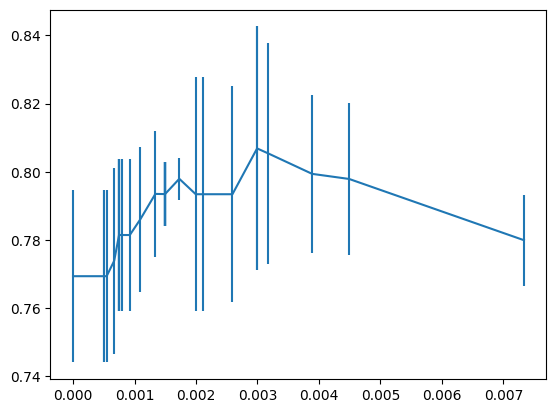

In [21]:
c.train(slack=1e-3)

In [22]:
c.tree.leaf_count()

12

In [23]:
utils.print_tree(c.tree)

Sex in ('female',)
├── False:Pclass<1.47
│   ├── False:0
│   └── True: PassengerId<344.28
│       ├── False:PassengerId<750.46
│       │   ├── False:0
│       │   └── True: 1
│       └── True: 0
└── True: Pclass<2.24
    ├── False:Fare<24.84
    │   ├── False:0
    │   └── True: Embarked in ('S',)
    │       ├── False:1
    │       └── True: Age<36.14
    │           ├── False:0
    │           └── True: PassengerId<181.64
    │               ├── False:Fare<11.24
    │               │   ├── False:1
    │               │   └── True: Fare<7.90
    │               │       ├── False:0
    │               │       └── True: 1
    │               └── True: 1
    └── True: 1



In [24]:
c.validate(df_test)

{'precision': array([0.86338798, 0.74853801]),
 'recall': array([0.84642857, 0.7734139 ]),
 'F-score': 0.80779841282389,
 'accuracy': 0.819304152637486}